In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from brian2 import *
from brian2tools import *
import numpy as np
import pandas as pd


# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        'font.size': 22,
        'ytick.color' : 'black',
        "xtick.color" : 'black',
        'axes.labelcolor' : 'black',
        'axes.edgecolor' : 'black'
	}
)

In [3]:
n_points = 200
n_samples = 1
vec_alpha = [0.1, 0.5, 0.7]

vec_alpha = np.array(vec_alpha)

EL = -60*mV
EE = 0*mV
EI = -80*mV
tauA = 1*ms
tauN = 100*ms
tauI = 10*ms
tauL = 20*ms
vt = -50*mV
nMg = 1*mM
gamma = 3.57*mM
b = 0.062/mV

eqs = '''
dv/dt = ((EL - v) + ((1 - alpha)*gA + alpha*s*gN)*(EE - v) + gI*(EI - v))/tauL : volt (unless refractory)
dgA/dt = -gA/tauA : 1
dgN/dt = -gN/tauN : 1
dgI/dt = -gI/tauI : 1
s = 1/(1+(nMg/gamma)*exp(-b*v)) : 1
alpha : 1
'''

rate = 5
dic_V_evol = {}

for alpha_value in vec_alpha:
	start_scope()
	defaultclock.dt = 0.01*ms
	print(alpha_value, end=' ')
	G = NeuronGroup(1, eqs, threshold='v>vt', reset='v=EL', refractory=2*ms, method='rk4')
	GPA = PoissonGroup(400, rates=rate*Hz)
	GPN = PoissonGroup(400, rates=rate*Hz)
	GPI = PoissonGroup(100, rates=rate*Hz)

	SA = Synapses(GPA, G, 'w : 1', on_pre='gA += w')
	SN = Synapses(GPN, G, 'w : 1', on_pre='gN += w')
	SI = Synapses(GPI, G, 'w : 1', on_pre='gI += w')
	SA.connect()
	SN.connect()
	SI.connect()

	G.v = EL
	SA.w = 0.1
	SN.w = 0.1
	SI.w = 0.4

	G.alpha = alpha_value
	
	run(5000*ms)

	M = StateMonitor(G, 'v', record=True)

	run(20000*ms)
	dic_V_evol[alpha_value] = M.v[0]/mV




0.1 0.5 0.7 

In [ ]:
V_data_path = "../../Data/V_data/"
pd.DataFrame(dic_V_evol).to_csv(f"{V_data_path}V_distr_NMDA.dat")

(array([9.96583660e-04, 8.08040805e-04, 5.38693870e-04, 6.19497951e-04,
        1.07738774e-03, 4.30955096e-04, 4.04020403e-04, 2.42412242e-04,
        1.88542855e-04, 2.15477548e-04, 2.15477548e-04, 2.42412242e-04,
        2.15477548e-04, 2.15477548e-04, 2.42412242e-04, 2.42412242e-04,
        2.69346935e-04, 9.42714273e-04, 1.45447345e-03, 1.21206121e-03,
        8.34975499e-04, 5.38693870e-04, 5.38693870e-04, 5.65628564e-04,
        5.65628564e-04, 7.27236725e-04, 7.54171418e-04, 7.00302031e-04,
        1.07738774e-03, 9.42714273e-04, 9.96583660e-04, 1.05045305e-03,
        9.42714273e-04, 1.75075508e-03, 7.00302031e-04, 2.42412242e-04,
        2.69346935e-04, 2.96281629e-04, 3.23216322e-04, 3.50151016e-04,
        1.37366937e-03, 1.93929793e-03, 4.30955096e-04, 3.23216322e-04,
        3.50151016e-04, 3.50151016e-04, 3.23216322e-04, 3.50151016e-04,
        3.50151016e-04, 3.50151016e-04, 3.50151016e-04, 2.42412242e-04,
        1.88542855e-04, 2.42412242e-04, 2.15477548e-04, 2.693469

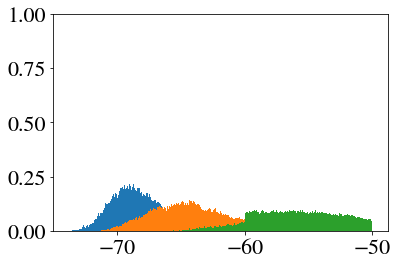

In [10]:
# plt.hist
plt.ylim(0,1)
plt.hist(dic_V_evol[0], bins=1000, density=True)
plt.hist(dic_V_evol[0.2], bins=1000, density=True)
plt.hist(dic_V_evol[0.5], bins=1000, density=True)
# dic_V_evol[100]